In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
leiden_df = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/nasim_ML.csv', sep = ',')

In [134]:
X = leiden_df.drop(['wall', 'liquid', 'Unnamed: 6', 'time (ns)'],axis = 1)
Y = leiden_df['Unnamed: 6']

In [135]:
# Cross-Validation
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [136]:
from sklearn.linear_model import LogisticRegression
# C = Higher the better, max_iter =
logit_model = LogisticRegression(C = 1e6, max_iter = 1e8, solver = 'lbfgs')

In [137]:
logit_model.fit(X_train, Y_train)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [138]:
# Accuracy
logit_model.score(X_test, Y_test)

1.0

In [139]:
from sklearn.metrics import confusion_matrix, classification_report

predictions = logit_model.predict(X)

In [140]:
confusion_matrix(Y, predictions)

array([[ 9,  0],
       [ 0, 39]])

In [141]:
X_grid = pd.read_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/X_grid.txt', header = None, delimiter = "   ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [142]:
from sklearn.metrics import confusion_matrix, classification_report
predictions_grid = logit_model.predict(X_grid)

In [143]:
X_grid[3]=pd.Series(predictions_grid)

In [144]:
X_grid

,0,1,2,3
0,8.0,3.000000,0.5,0
1,8.0,3.015075,0.5,0
2,8.0,3.030151,0.5,0
3,8.0,3.045226,0.5,0
4,8.0,3.060302,0.5,0
...,...,...,...,...
7999995,320.0,5.939699,4.0,1
7999996,320.0,5.954774,4.0,1
7999997,320.0,5.969849,4.0,1
7999998,320.0,5.984925,4.0,1


In [145]:
xlist = np.linspace(40, 320, 100)

In [146]:
ylist = np.linspace(3, 6, 100)

In [147]:
X, Y = np.meshgrid(xlist, ylist)

In [148]:
X_grid_df = pd.DataFrame()

In [149]:
X_grid_df[0] = pd.Series(X.ravel())

In [150]:
X_grid_df[1] = pd.Series(Y.ravel())

In [151]:
X_grid_df[2] = 0.5

In [152]:
Z = logit_model.predict(X_grid_df)

In [153]:
classification_results = X_grid_df

In [154]:
classification_results[3] = pd.Series(Z)

In [155]:
classification_results.to_csv('/content/drive/MyDrive/Rice Google Drive/Research/Misc/classification_results.csv', sep=',')

In [156]:
Z = Z.reshape(X.shape)

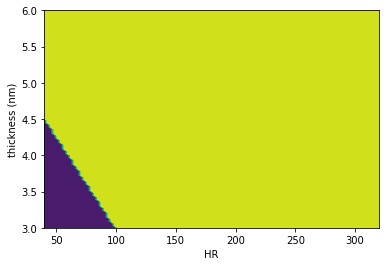

In [157]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, Z)
ax.set_xlabel('HR')
ax.set_ylabel('thickness (nm)')
plt.show()

In [158]:
leiden_df

,HR,thickness,wetting,wall,liquid,time (ns),Unnamed: 6
0,320,3,0.5,342.0,133.0,1.79,1
1,320,4,0.5,336.0,125.0,1.77,1
2,320,5,0.5,334.0,125.0,1.78,1
3,320,6,0.5,345.0,123.0,1.80,1
4,160,3,0.5,309.0,142.0,2.38,1
5,160,4,0.5,288.0,134.0,2.24,1
6,160,5,0.5,280.0,126.0,2.20,1
7,160,6,0.5,285.0,125.0,2.22,1
8,80,3,0.5,NaN,NaN,NaN,0
9,80,4,0.5,261.0,143.0,3.16,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


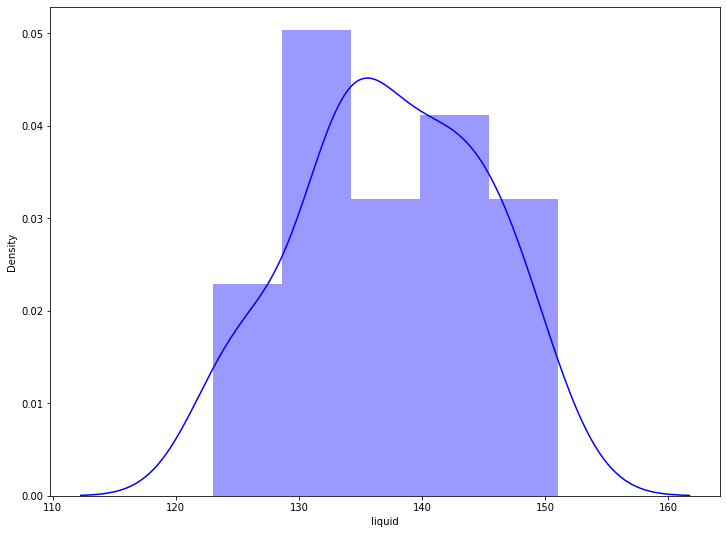

In [159]:
plt.figure(figsize=(12,9))
sns.distplot(leiden_df['liquid'], color = 'blue')
plt.show()

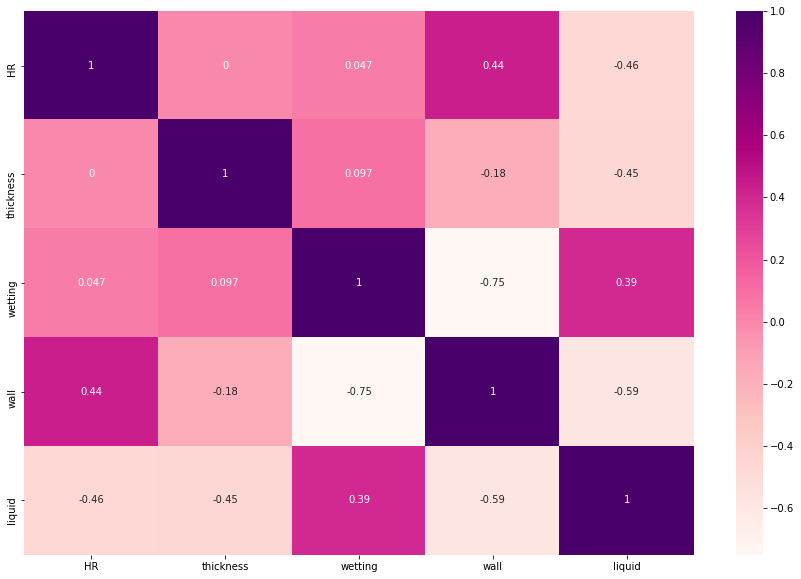

In [160]:
plt.figure(figsize =(15,10))
sns.heatmap(leiden_df.drop(['time (ns)', 'Unnamed: 6'],axis=1).corr(), annot = True, cmap = 'RdPu')
plt.show()

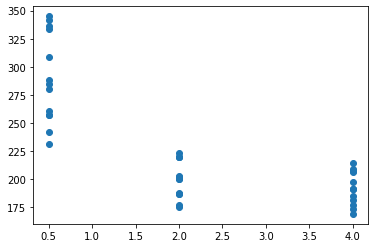

In [161]:
plt.scatter(leiden_df['wetting'], leiden_df['wall'])

In [162]:
leiden_df.dropna(inplace=True)
X = leiden_df.iloc[:,0:3]
Y = leiden_df['wall']

In [163]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
X_scaled = scaler.fit_transform(X)

In [175]:
from sklearn.model_selection import train_test_split
# try random_state 0 to 9, and find best accuracy
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.1, random_state = 1)

In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(normalize = True)

In [177]:
# Fit() Training the  algorithm
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [178]:
lin_reg.score(X_test, Y_test)

0.6366845641779892

In [179]:
lin_reg.score(X_scaled, Y)

0.7357189662949097

In [180]:
predicted = lin_reg.predict(X_scaled)

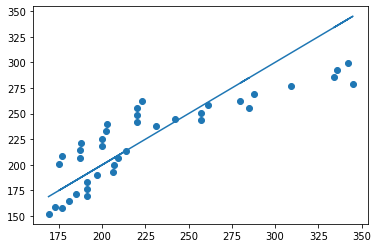

In [181]:
plt.scatter(Y, predicted)
plt.plot(Y,Y)

In [182]:
yhat = lin_reg.predict(X_test)

In [183]:
# RMSE
# np.sqrt(mean_squared_error(Y_test, yhat))